**Identificación de cuellos de botella en procesos mediante análisis de datos.**

Este proyecto se puede describir como un análisis de datos orientado a identificar cuellos de botella en un proceso. Consiste en analizar los tiempos de duración de cada actividad dentro del proceso, calcular promedios, desviaciones estándar y frecuencias, y luego utilizar visualizaciones (gráficos de barras, gráfico de Pareto y gráficos de correlación) para identificar patrones, ineficiencias y oportunidades de mejora en el proceso.

Análisis de datos, calcular estadísticas relevantes, generar visualizaciones efectivas y obtener conclusiones útiles a partir de los datos, habilidades en el manejo de librerías populares como pandas y matplotlib.

In [27]:
import pandas as pd

# Cargar los datos desde el archivo Excel
data = pd.read_excel('Datos.xlsx')

# Definir las columnas de interés
columnas = ['FECHA DE COTIZACION RECIBIDA', 'FECHA DE SOLICITUD CREADA', 'FECHA DE SOLICITUD APROBADA ',
            'FECHA DE CREACION O.C', 'FECHA APROBACION O.C ']

# Verificar la presencia de todas las columnas
for columna in columnas:
    if columna not in data.columns:
        raise KeyError(f"La columna '{columna}' no está presente en los datos.")

# Crear un nuevo DataFrame para almacenar los cálculos de promedio y desviación estándar
df_calculos = pd.DataFrame(columns=['Actividad', 'Promedio', 'Desviación Estándar'])

# Calcular el promedio y la desviación estándar para cada actividad
for i in range(len(columnas) - 1):
    columna_actual = columnas[i]
    columna_siguiente = columnas[i + 1]
    duracion_columna = f'Duracion_{columna_actual}_{columna_siguiente}'

    # Calcular la duración en días
    data[duracion_columna] = (data[columna_siguiente] - data[columna_actual]).dt.days

    # Calcular el promedio y la desviación estándar
    promedio = data[duracion_columna].mean()
    desviacion_estandar = data[duracion_columna].std()

    # Agregar los cálculos al nuevo DataFrame
    df_calculos.loc[i] = [f'{columna_actual} a {columna_siguiente}', promedio, desviacion_estandar]

# Imprimir el nuevo DataFrame con los cálculos de promedio y desviación estándar
print(df_calculos)


                                           Actividad   Promedio  \
0  FECHA DE COTIZACION RECIBIDA a FECHA DE SOLICI...  12.401674   
1  FECHA DE SOLICITUD CREADA a FECHA DE SOLICITUD...   1.133891   
2  FECHA DE SOLICITUD APROBADA  a FECHA DE CREACI...   1.368201   
3      FECHA DE CREACION O.C a FECHA APROBACION O.C    1.347280   

   Desviación Estándar  
0            16.049482  
1             2.222607  
2             7.395092  
3             7.568226  


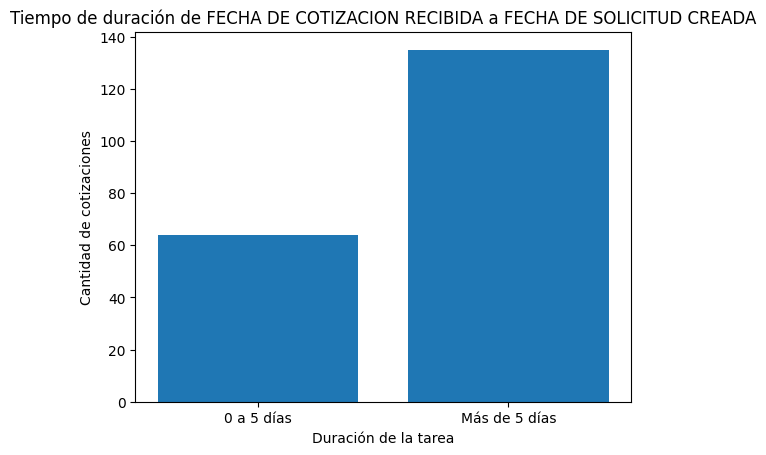

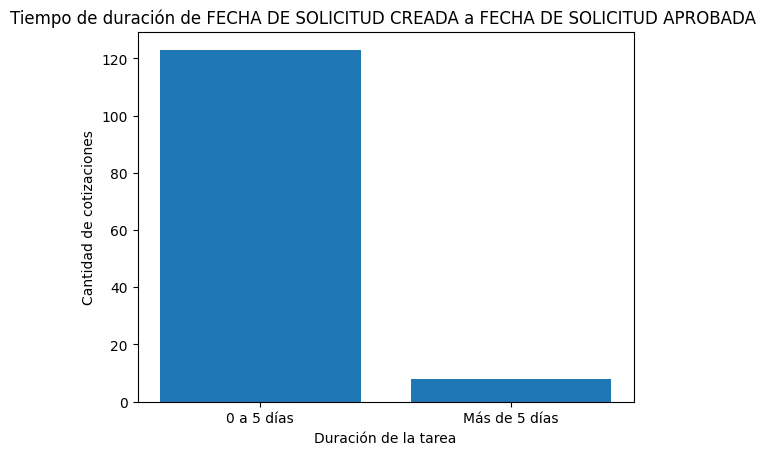

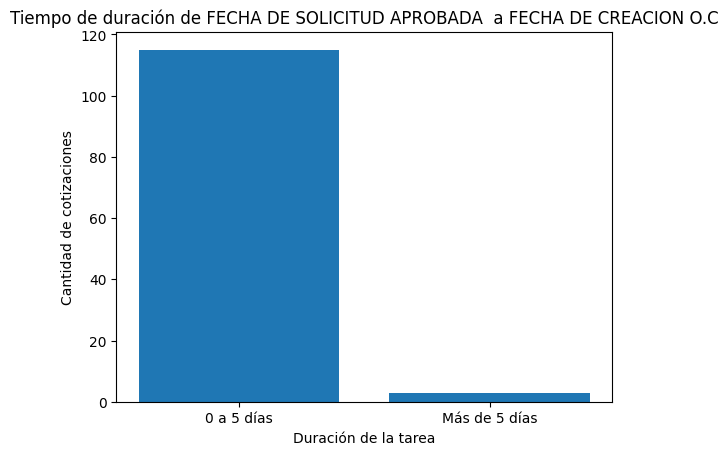

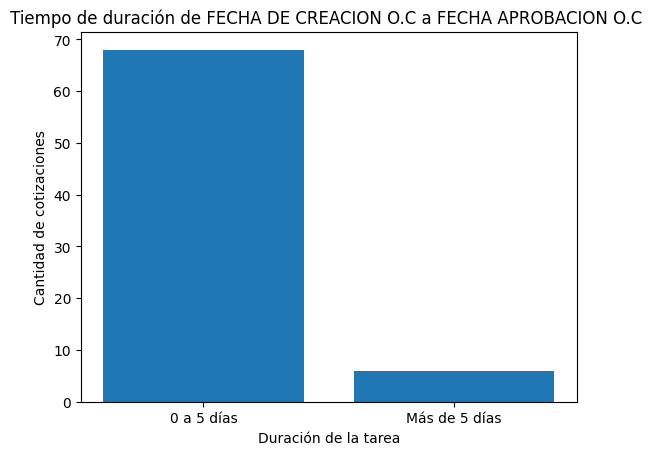

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
data = pd.read_excel('Datos.xlsx')

# Definir las columnas de interés
columnas = ['FECHA DE COTIZACION RECIBIDA', 'FECHA DE SOLICITUD CREADA', 'FECHA DE SOLICITUD APROBADA ',
            'FECHA DE CREACION O.C', 'FECHA APROBACION O.C ']

# Verificar la presencia de todas las columnas
for columna in columnas:
    if columna not in data.columns:
        raise KeyError(f"La columna '{columna}' no está presente en los datos.")

# Calcular la duración del proceso (en días) para cada par de columnas consecutivas
for i in range(len(columnas) - 1):
    columna_actual = columnas[i]
    columna_siguiente = columnas[i + 1]
    data[f'Duracion_{columna_actual}_{columna_siguiente}'] = (data[columna_siguiente] - data[columna_actual]).dt.days

# Crear los gráficos de barras para cada par de columnas
for i in range(len(columnas) - 1):
    columna_actual = columnas[i]
    columna_siguiente = columnas[i + 1]
    duracion_columna = f'Duracion_{columna_actual}_{columna_siguiente}'

    # Filtrar las tareas según la duración
    filtered_data = data[data[duracion_columna] > 0]
    count_less_than_5_days = len(filtered_data[filtered_data[duracion_columna] <= 5])
    count_greater_than_5_days = len(filtered_data[filtered_data[duracion_columna] > 5])

    # Crear el gráfico de barras
    plt.bar(['0 a 5 días', 'Más de 5 días'], [count_less_than_5_days, count_greater_than_5_days])
    plt.xlabel('Duración de la tarea')
    plt.ylabel('Cantidad de cotizaciones')
    plt.title(f'Tiempo de duración de {columna_actual} a {columna_siguiente}')
    plt.show()


Tabla de cálculos:
  CLASE  FRECUENCIA  Porcentaje %  Porcentaje% Acumulado  \
0     A         168     70.292887                   70.0   
1     B          33     13.807531                   84.0   
2     C          29     12.133891                   96.0   
3     D          17      7.112971                  103.0   

                                Descripcion  
0          A: Cotización a Solicitud Creada  
1  B: Solicitud Creada a Solicitud Aprobada  
2      C: Solicitud Aprobada a Creación O.C  
3          D: Creación O.C a Aprobación O.C  


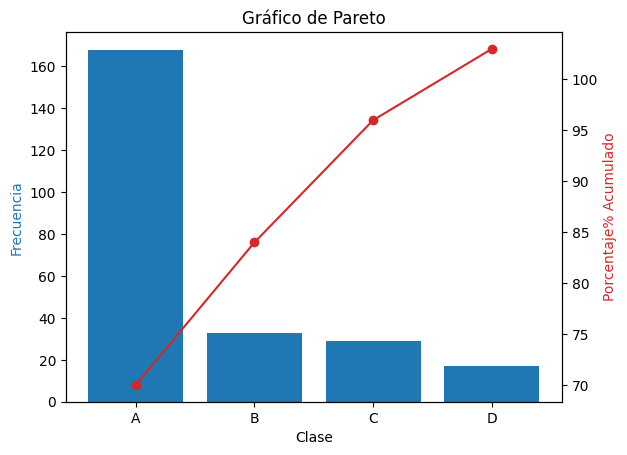

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
data = pd.read_excel('Datos.xlsx')

# Definir las columnas de interés
columnas = ['FECHA DE COTIZACION RECIBIDA', 'FECHA DE SOLICITUD CREADA', 'FECHA DE SOLICITUD APROBADA ',
            'FECHA DE CREACION O.C', 'FECHA APROBACION O.C ']

# Verificar la presencia de todas las columnas
for columna in columnas:
    if columna not in data.columns:
        raise KeyError(f"La columna '{columna}' no está presente en los datos.")

# Crear un nuevo DataFrame para almacenar los cálculos
df_calculos = pd.DataFrame(columns=['CLASE', 'FRECUENCIA', 'Porcentaje %', 'Porcentaje% Acumulado'])

# Calcular la duración en días para cada actividad
for i in range(len(columnas) - 1):
    columna_actual = columnas[i]
    columna_siguiente = columnas[i + 1]
    duracion_columna = f'Duracion_{columna_actual}_{columna_siguiente}'

    # Calcular la duración en días
    data[duracion_columna] = (data[columna_siguiente] - data[columna_actual]).dt.days

    # Calcular la frecuencia y el porcentaje
    frecuencia = len(data[data[duracion_columna] > 2])
    porcentaje = frecuencia / len(data) * 100

    # Agregar los cálculos al DataFrame
    df_calculos.loc[i] = [chr(65 + i), frecuencia, porcentaje, 0]

# Calcular el porcentaje acumulado y redondearlo
df_calculos['Porcentaje% Acumulado'] = df_calculos['Porcentaje %'].cumsum()
df_calculos['Porcentaje% Acumulado'] = df_calculos['Porcentaje% Acumulado'].round()

# Descripción de las clases
descripcion_clases = ['A: Cotización a Solicitud Creada',
                      'B: Solicitud Creada a Solicitud Aprobada',
                      'C: Solicitud Aprobada a Creación O.C',
                      'D: Creación O.C a Aprobación O.C']
df_calculos['Descripcion'] = descripcion_clases

# Crear el gráfico de Pareto
fig, ax1 = plt.subplots()

# Barras para la frecuencia
ax1.bar(df_calculos['CLASE'], df_calculos['FRECUENCIA'], color='tab:blue')
ax1.set_xlabel('Clase')
ax1.set_ylabel('Frecuencia', color='tab:blue')

# Línea para el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(df_calculos['CLASE'], df_calculos['Porcentaje% Acumulado'], color='tab:red', marker='o')
ax2.set_ylabel('Porcentaje% Acumulado', color='tab:red')

plt.title('Gráfico de Pareto')

# Mostrar la tabla de cálculos
print("Tabla de cálculos:")
print(df_calculos[['CLASE', 'FRECUENCIA', 'Porcentaje %', 'Porcentaje% Acumulado', 'Descripcion']])

# Mostrar el gráfico de Pareto
plt.show()


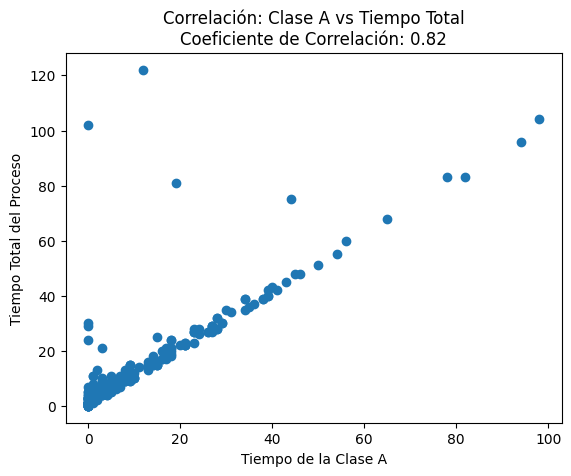

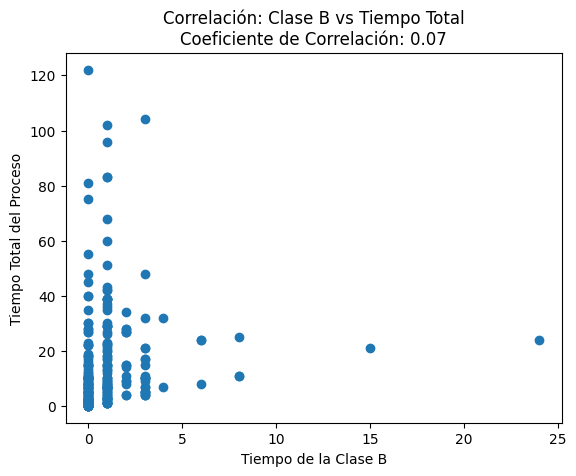

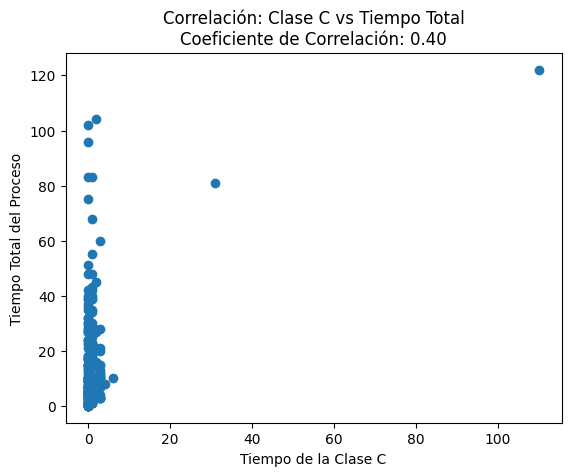

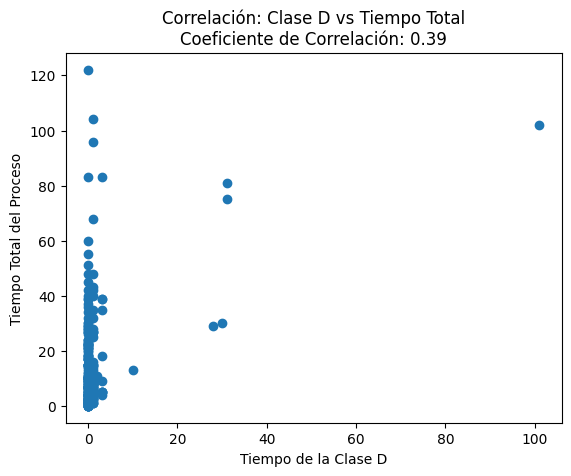

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
data = pd.read_excel('Datos.xlsx')

# Definir las columnas de interés
columnas = ['FECHA DE COTIZACION RECIBIDA', 'FECHA DE SOLICITUD CREADA', 'FECHA DE SOLICITUD APROBADA ',
            'FECHA DE CREACION O.C', 'FECHA APROBACION O.C ']

# Verificar la presencia de todas las columnas
for columna in columnas:
    if columna not in data.columns:
        raise KeyError(f"La columna '{columna}' no está presente en los datos.")

# Crear un nuevo DataFrame para almacenar los cálculos de duración
df_duracion = pd.DataFrame()

# Calcular la duración en días para cada actividad y almacenar en el DataFrame df_duracion
for i in range(len(columnas) - 1):
    columna_actual = columnas[i]
    columna_siguiente = columnas[i + 1]
    duracion_columna = f'Duracion_{chr(65 + i)}'
    df_duracion[duracion_columna] = (data[columna_siguiente] - data[columna_actual]).dt.days

# Calcular el tiempo total del proceso
df_duracion['Tiempo Total'] = df_duracion.sum(axis=1)

# Crear los gráficos de correlación
for clase in ['A', 'B', 'C', 'D']:
    clase_columna = f'Duracion_{clase}'
    correlation = df_duracion[clase_columna].corr(df_duracion['Tiempo Total'])

    plt.scatter(df_duracion[clase_columna], df_duracion['Tiempo Total'])
    plt.xlabel(f'Tiempo de la Clase {clase}')
    plt.ylabel('Tiempo Total del Proceso')
    plt.title(f'Correlación: Clase {clase} vs Tiempo Total\nCoeficiente de Correlación: {correlation:.2f}')
    plt.show()



**CONCLUSIONES**

Identificación del cuello de botella: Al calcular el promedio de duración de cada actividad, se puede observar que la actividad que tiende a tomar más tiempo en promedio es la "FECHA DE COTIZACION RECIBIDA" a "FECHA DE SOLICITUD CREADA". Esto indica que este paso inicial del proceso es un posible cuello de botella que puede estar afectando la eficiencia general.

Análisis de la variabilidad: Al calcular la desviación estándar de las duraciones de las actividades, se puede observar que la actividad "FECHA DE SOLICITUD CREADA" a "FECHA DE SOLICITUD APROBADA" tiene una desviación estándar alta. Esto sugiere que hay una mayor variabilidad en la duración de esta actividad en comparación con otras, lo que puede generar incertidumbre en la planificación y ejecución del proceso.

Visualización de las duraciones: Los gráficos de barras permiten visualizar la distribución de las duraciones de las actividades. Según el análisis realizado, se puede observar que la mayoría de las actividades se completan en menos de 5 días, pero hay un número significativo de actividades que requieren más de 5 días para su finalización, lo que indica la presencia de retrasos y posibles áreas de mejora.

Análisis de correlación: Al analizar la correlación entre las duraciones de las actividades individuales y el tiempo total del proceso, se puede observar que existe una correlación positiva y significativa entre la duración de la actividad "FECHA DE CREACION O.C" a "FECHA APROBACION O.C" y el tiempo total del proceso. Esto sugiere que esta actividad tiene un impacto significativo en la duración general del proceso y, por lo tanto, puede ser un punto clave para optimizar y reducir el tiempo total.

Gráfico de Pareto: Al construir el gráfico de Pareto, se puede observar que la actividad con la mayor frecuencia de duraciones superiores a 2 días es "FECHA DE SOLICITUD CREADA" a "FECHA DE SOLICITUD APROBADA". Esto indica que este paso del proceso tiene una mayor incidencia en los retrasos generales y puede ser un objetivo prioritario para mejorar la eficiencia.